## <center><font color=navy>Big Data Economics</font></center>
### <center>Artificial Neural Networks</center>
#### <center>Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<img src='images/ai_ml.png' style='width: 70%'/>

<img src='images/supervised.png' style='width: 70%'/>



### Readings:

1. Chapter 11, [The Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)
2. Chapter 20, [Understanding Machine Learning: From Theory to Algorithms](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf) 
3. Artificial Neural Networks for Time Series Analysis, Ali Habibnia (on Canvas)
4. A Gentle Introduction to Neural Networks (with Python), by Tariq Rashid [YouTube Video](https://www.youtube.com/watch?v=SJWCcCeuRas&t=1738s)

### Translate between Econometrics (statistics) and Machine Learning

|Econometrics|Machine Learning|
|-----|-----|
|X: Explanatory Variables |X: Input Variables|
|y: Dependent Variable|y: Out put Variable|
|$\beta_0$: Intercept/Constant|b: Bias |
|$\beta$: Coeficients|$w$: weights|
|$f()$: Linear Model|$f()$: Algorithms|
|We estimate $\beta$|We learn/train/fit $w$|
|in-sample & out-of-samle|train (+validation)& test|
|Shrinkage|Regularization|

Though many phenomena in the world can be adequately modeled using linear regression or classification, most interesting phenomena are generally nonlinear in nature. In order to deal with nonlinear phenomena, there have been a diversity of nonlinear models developed. For example parametric models assume that data follow some parameteric class of nonlinear function (e.g. polynomial, power, or exponential). Another class of models, the ones that are the focus of this notebook, are artificial neural networks (ANNs). ANNs are nonlinear models motivated by the physiological architecture of the nervous system. They involve a cascade of simple nonlinear computations that when aggregated can implement robust and complex nonlinear functions. 

There is a fascinating history that goes back to the 1940s full of ups and downs, twists and turns, friends and rivals, and successes and failures. An idea that was once sort of an ugly duckling has blossomed to become the belle of the ball.

<img src='images/nn_timeline.jpg' style='width: 110%'/>


Early work in machine learning was largely informed by the current working theories of the brain. The first guys on the scene were Walter Pitts and Warren McCulloch. They had developed a technique known as “thresholded logic unit” and was designed to mimic the way a neuron was thought to work (which will be a recurring theme). 

However, it isn’t until [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt)’s “[perceptron](https://en.wikipedia.org/wiki/Perceptron)” that we see the first real precursor to modern neural networks. For its day, this thing was pretty impressive. It came with a learning procedure that would provably converge to the correct solution and could recognize letters and numbers. Rosenblatt was so confident that the perceptron would lead to true AI, that in 1959 he remarked:


Rosenblatt’s perceptron began to garner quite a bit of attention, and one person in particular began to take notice. [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky), who is often thought of as one of the father’s of AI, began to sense that something was off with Rosenblatt’s perceptron. Minsky is quoted saying:



    However, I started to worry about what such a machine could not do. For example, it could tell ‘E’s from ‘F’s, and ‘5’s from ‘6’s—things like that. But when there were disturbing stimuli near these figures that weren’t correlated with them the recognition was destroyed.

Along with Seymor Papert, Minksy wrote a book entitled Perceptrons that effectively killed the perceptron, ending embryonic idea of a neural net. They showed that the perceptron was incapable of learning the simple **exclusive-or (XOR) function**. Worse, they proved that it was theoretically impossible for it to learn such a function, no matter how long you let it train. Now this isn’t surprising to us, as the model implied by the perceptron is a linear one and the XOR function is nonlinear, but at the time this was enough to kill all research on neural nets and usher in the first AI winter.

### Let's start again from LR

In the machine learning problems, we would like to learn a function $ f $, which predicts the output $ y $ from the input $ X $.
$$\begin{equation} y = f(X) \end{equation}$$
The $ f $ is referred to as the regression or classification function, and this learning problem is also known as function approximation in the field of mathematics.

The regression problem is basically a good way to predict a continuous output $ Y $. And it is OK to use a discrete $ Y $ for the regression problem.
A discrete $ Y $ leads the problem to the classification. For example, "whether $ Y $ is 0 or 1"

We compute $ \hat{f}$ from the training data $(\mathbf{X}, \mathbf{y})$ with whatever method, and then bring the test data and test it (how good the $\hat{f}$ is?). 
Since, of course, it is extremely difficult to do such task without a clue, we simplify the situation by enchanting $ f $ with a special property.

#### In Linear Regression

The most absurd assumption is that $ f $ is linear.
With $ X \in \mathbb{R}^p$ and $y \in \mathbb{R} $, we can write the linear regression function as
$$\begin{align} y &= f(X) \\ &= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p \\ &= \beta^T X, \end{align}$$
where, for brevity, $ X $ and $ \beta $ are $ (p+1) $-vector containing the intercept, respectively.

Now estimating $ f $ comes equivalent with finding $ \beta $. Exaggeratingly speaking, linear regression is that you see the point cloud and draw your proper straight line. The linear regression fit $ \hat{f} $ can be computed by the least squares.

Here goes the simplest example.
$$\begin{equation} Y = \beta_0 + \beta_1 X \end{equation}$$

In [1]:
import csv
import scipy
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Y = 0.100158 + 0.009567X


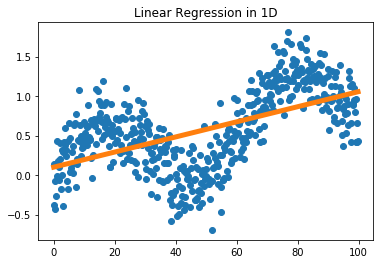

In [2]:
"""The simplest example for 1D linear regression"""
# Generate data (sine-like wave)
sample_size = 500
sample_x = scipy.arange(0, 100, 100/sample_size)
sample_y_true = scipy.sin(sample_x/10)/2 + sample_x*.01
sample_y = sample_y_true + scipy.randn(sample_size)/4

# Plot the data
fig0 = plt.figure(0)
ax0 = fig0.add_subplot(1, 1, 1)
ax0.plot(sample_x, sample_y, 'o')

# Implementation for the 1D linear regression
mat_1x = scipy.vstack((scipy.ones(sample_size), sample_x)).T
hat_beta = scipy.linalg.solve((mat_1x.T @ mat_1x),
                              (mat_1x.T @ sample_y))

# Compute the fit
hat_y = mat_1x @ hat_beta

# Plot the fit
ax0.plot(sample_x, hat_y, linewidth=5)
ax0.set_title('Linear Regression in 1D')
print('Y = {:5f} + {:5f}X'.format(*hat_beta))

From the above picture, the computed straight line looks either good or bad. 

1. Does the line explains the original data? Bad. We actually did wrong with picking the model, since we saw the curvy data but fit with the straight line. (High bias) 
2. How well does the line predict a new data? Good. (Low variance)

The straight line is simple, and simple is good, because

- it makes the computation easier,
- it makes the interpretation easier, and
- it works well with the scarce data.


#### Polynomial Regression

A reason why many textbooks primarily deal with the linear regression is that it allows us to fit in more complex way with the same method. The idea is simple. Assume we want to fit a quadratic curve instead of a straight line. Then we change the original linear model
$$\begin{equation} Y = \beta_0 + \beta_1 X \end{equation}$$
to the quadratic model by adding the quadratic term as
$$\begin{equation} Y = \beta_0 + \beta_1 X + \beta_2 X^2. \end{equation}$$
To get the estimate of $ \beta_0, \beta_1, \beta_2 $, the corresponding training data change in the same way
$$\begin{equation} \mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{bmatrix} \quad\Longrightarrow\quad \mathbf{X} = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_N & x_N^2 \end{bmatrix}, \end{equation}$$
and the final computation is done with the plain linear regression.

Y = 0.403879 + -0.008729X + 0.000183X^2
Y = 0.640105 + -0.037276X + 0.000899X^2 + -0.000005X^3


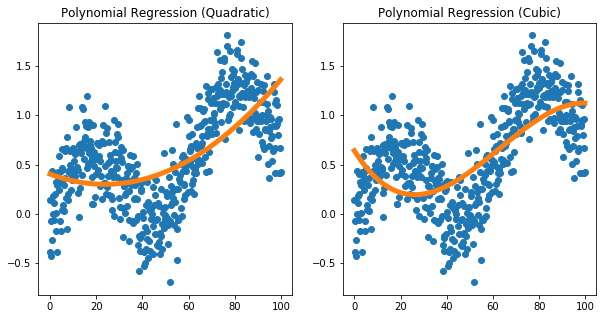

In [3]:
"""1D polynomial regression"""
# Plot the data
fig1 = plt.figure(1, figsize=(10, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax11.plot(sample_x, sample_y, 'o')
ax12 = fig1.add_subplot(1, 2, 2)
ax12.plot(sample_x, sample_y, 'o')

# Implementation for the 1D polynomial regression (quadratic/cubic)
mat_1x2 = scipy.vstack((scipy.ones(sample_size),
                        sample_x, sample_x*sample_x)).T
hat_beta2 = scipy.linalg.solve((mat_1x2.T @ mat_1x2),
                               (mat_1x2.T @ sample_y))
mat_1x3 = scipy.hstack((mat_1x2,
                        (sample_x*sample_x*sample_x).reshape(-1, 1)))
hat_beta3 = scipy.linalg.solve((mat_1x3.T @ mat_1x3),
                               (mat_1x3.T @ sample_y))

# Compute the fits
hat_y2 = mat_1x2 @ hat_beta2
hat_y3 = mat_1x3 @ hat_beta3

# Plot the fit
ax11.plot(sample_x, hat_y2, linewidth=5)
ax11.set_title('Polynomial Regression (Quadratic)')
ax12.plot(sample_x, hat_y3, linewidth=5)
ax12.set_title('Polynomial Regression (Cubic)')
print('Y = {:5f} + {:5f}X + {:5f}X^2'.format(*hat_beta2))
print('Y = {:5f} + {:5f}X + {:5f}X^2 + {:5f}X^3'.format(*hat_beta3))

### Neural Networks  (Moving Beyond Linearity)

- The central idea is to extract linear combinations of the inputs as derived features, and then model the target as a nonlinear function of these features. We note that the name "neural networks" derives from the fact that they were first developed as models for the human brain. Each unit represents a neuron, and the connections represent synapses.

<img src="images/intro_nn.png"/>



#### Single layer perceptron

The term _neural networks_ has evolved to encompass a large class of models and learning methods. Here we describe the most widely used "vanilla" neural net, sometimes called the **single hidden layer back-propagation network, or single layer perceptron**. See [Neural Network Architectures](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)

There has been a great deal of _hype_ surrounding neural networks, making them seem magical and mysterious. As we make clear in this section, they are just nonlinear statistical models.

A neural network is a two-stage regression or classification model, typically represented by a _network diagram_ as in FIGURE 11.2. (from The Elements of Statistical Learning) This network applies both to regression or classification.

<img src='images/11.2.png' style='width: 60%'/>



* For regression, typically $K=1$ and there is only one output unit $Y_1$ at the top.  
  However, these networks can handle multiple quantitative responses in a seamless fashion, so we will deal with the general case.
* For $K$-class classification, there are $K$ units at the top, with the $k$th unit modeling the probability of class $k$. There are $K$ target measurements $Y_k$ each being coded as a 0-1 variable for the $k$th class.

### $Z$

Derived features $Z_m$ are created from linear combinations of the inputs, and the target $Y_k$ is modeled as a function of linear combinations of the $Z_m$,

\begin{align}
Z_m &= \sigma(\alpha_{0m} + \alpha_m^T X), & m=1,\cdots,M, \\
T_k &= \beta_{0k} + \beta_k^T Z, & k=1,\cdots,K, \\
f_k(X) &= g_k(T), & k=1,\cdots,K.
\end{align}

### Sigmoid

The activation function $\sigma(v)$ is usually chosen to be the _sigmoid_

\begin{equation}
\sigma(v) = \frac{1}{1+e^{-v}}.
\end{equation}

See FIGURE 11.3 for a plot of the sigmoid function.

<img src='images/11.3.png' style='width: 70%'/>


In [1]:
"""FIGURE 11.3. Plot of the sigmoid function.
The scale parameter s controls the activation rate,
and we can see that large s amounts to a hard activation at v=0.
Note that sigmoid(s(v-v0)) shifts the activation threshold from 0 to v0."""
import scipy
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x:scipy.ndarray, s:float)->scipy.ndarray:
    return scipy.reciprocal(1+scipy.exp(-s*x))

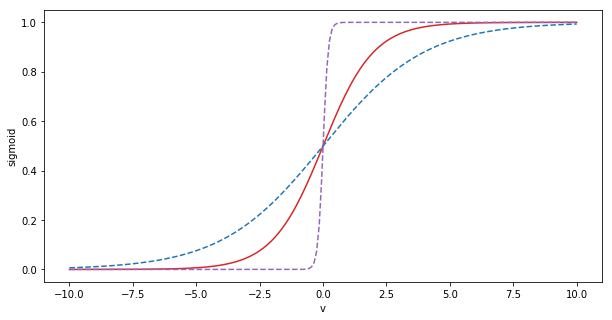

In [4]:
x = scipy.linspace(-10, 10, 200)
y_1 = sigmoid(x, 1)
y_half = sigmoid(x, .5)
y_10 = sigmoid(x, 10)

fig = plt.figure(0, figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y_1, color='C3')
ax.plot(x, y_half, '--', color='C0')
ax.plot(x, y_10, '--', color='C4')
ax.set_xlabel('v')
ax.set_ylabel('sigmoid')
plt.show()

By definition, activation function is a function used to transform the activation level of a unit (neuron) into an output signal. Typically, activation function has a “squashing” effect.  

Activation functions are usually introduced as requiring to be a non-linear function, that is, the role of activation function is made neural networks non-linear.  

<img src="images/neuralnetworkexample_ac.png"/>

Here I summarize several common-used activation functions, like Sigmoid, Tanh, ReLU, Softmax and so forth, as well as their merits and drawbacks.

<img src="images/activationfun.png" style='width: 75%'/>



### Bias unit (similar to the intercept/constant term in linear regression)

Neural network diagrams like FIGURE 11.2 are sometimes drawn with an additional _bias_ unit feeding into every unit in the hidden and output layers. Thinking of the constant "$1$" as an additional input feature, this bias unit captures the intercept $\alpha_{0m}$ and $\beta_{0k}$ in the above model.

### $g_k$

The output function $g_k(T)$ allows a final transformation of the vector of outputs $T$. For regression we typically choose the identity function $g_k(T) = T$.

Early work in $K$-class classification also used the identity function, but this was later abandoned in favor of the _softmax_ functon

\begin{equation}
g_k(T) = \frac{\exp T_k}{\sum_{l=1}^K \exp T_l}.
\end{equation}


### $Z$ again

The units in the middle of the network, computing the derived features $Z_m$, are called _hidden units_ because the values $Z_m$ are not directly observed.

We can think of the $Z_m$ as a basis expansion of the original inputs $X$; the neural network is then a standard linear model, or linear multilogit model, using these transformations and inputs.

There is, however, an important enhancement over the basis expansion techniques;

> here the parameters of the basis functions are learned from the data.

### Nonlinear generalization of the linear model

Notice that if $\sigma$ is the identity function, then the entire model collapses to a linear model in the inputs. Hence a neural network can be thought of as a nonlinear generalization of the linear model, both for regression and classification. By introducing the nonlinear transformation $\sigma$, it greatly enlarges the class of linear models.

In FIGURE 11.3 we see that
* the rate of activation of the sigmoid depends on the norm of $\alpha_m$, and
* if $\|\alpha_m\|$ is very small, the unit will indeed be operating in the _linear part_ of its activation function.

### Fitting Neural Networks

The neural network model has unknown parameters, often called _weights_, and we seek values for them that make the model fit the training data well.

We denote the complete set of weights by $\theta$, which consists of

\begin{align}
\{ \alpha_{0m}, \alpha_m : m=1,2,\cdots,M \} & & M(p+1) \text{ weights}, \\
\{ \beta_{0k}, \beta_k : k=1,2,\cdots,K \} & & K(M+1) \text{ weights}.
\end{align}

For regression, we use sum-of-squared errors as our measure of fit (error function)

\begin{equation}
R(\theta) = \sum_{k=1}^K \sum_{i=1}^N (y_{ik} - f_k(x_i))^2.
\end{equation}

For classification we use either squared error or cross-entropy (deviance)

\begin{equation}
R(\theta) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik}\log f_k(x_i),
\end{equation}

and the corresponding classifier is

\begin{equation}
G(x) = \arg\max_k f_k(x).
\end{equation}

With the softmax activation function and the cross-entropy error function, the neural network model is exactly a linear logistic regression in the hidden units, and all the parameters are estimated by maximum likelihood.

### Back-propagation = gradient descent

The generic approach to minimizing $R(\theta)$ is by gradient descent, called _back-propagation_ in this setting. Because of the compositional form of the model, the gradient can be easily derived using the chain rule for differentiation.

This can be computed by a forward and backward sweep over the network, keeping track only of quantities local to each unit.

### Back-propagation for squared error loss

Let
* $z_{mi} = \sigma(\alpha_{0m} + \alpha_m^T x_i)$, and
* $z_i = (z_{1i}, z_{2i}, \cdots, z_{Mi})$.

Then we have

\begin{align}
R(\theta) &\equiv \sum_{i=1}^N R_i \\
&= \sum_{i=1}^N \sum_{k=1}^K \left( y_{ik} - f_k(x_i) \right)^2,
\end{align}

with derivatives

\begin{align}
\frac{\partial R_i}{\partial\beta_{km}} &= -2\left( y_{ik} - f_k(x_i) \right) g_k'(\beta_k^T z_i) z_{mi}, \\
\frac{\partial R_i}{\partial\alpha_{ml}} &= -2\sum_{k=1}^K \left( y_{ik} - f_k(x_i) \right) g_k'(\beta_k^T z_i) \beta_{km} \sigma'(\alpha_m^T x_i) x_{il}.
\end{align}

Given these derivatives, a gradient descent update at the $(r+1)$st iteration has the form

\begin{align}
\beta_{km}^{(r+1)} &= \beta_{km}^{(r)} - \gamma_r \sum_{i=1}^N \frac{\partial R_i}{\partial\beta_{km}^{(r)}}, \\
\alpha_{ml}^{(r+1)} &= \alpha_{ml}^{(r)} - \gamma_r \sum_{i=1}^N \frac{\partial R_i}{\partial \alpha_{ml}^{(r)}},
\end{align}

where $\gamma_r$ is the learning rate, discussed below.

### Back-propagation equations

Now write the gradients as

\begin{align}
\frac{\partial R_i}{\partial\beta_{km}} &= \delta_{ki} z_{mi}, \\
\frac{\partial R_i}{\partial\alpha_{ml}} &= s_{mi} x_{il}.
\end{align}

The quantities $\delta_{ki}$ and $s_{mi}$ are "errors" from the current model at the output and hidden layer units, respectively. From their definitions, these errors satisfy

\begin{equation}
s_{mi} = \sigma'(\alpha_m^T x_i) \sum_{k=1}^K \beta_{km} \delta_{ki},
\end{equation}

known as the _back-propagation equations_. Using this, the gradient descent updates can be implemented with a two-pass algorithm.
1. In the _forward pass_, the current weights are fixed and the predicted values $\hat{f}_k(x_i)$ are computed from the formula  
  
  \begin{align}
  Z_m &= \sigma(\alpha_{0m} + \alpha_m^T X), & m=1,\cdots,M, \\
  T_k &= \beta_{0k} + \beta_k^T Z, & k=1,\cdots,K, \\
  f_k(X) &= g_k(T), & k=1,\cdots,K.
  \end{align}
  
2. In the _backward pass_, the errors $\delta_{ki}$ are computed, and then back-propagated via  

  \begin{equation}
  s_{mi} = \sigma'(\alpha_m^T x_i) \sum_{k=1}^K \beta_{km} \delta_{ki},
  \end{equation}
  
  to give the errors $s_{mi}$.

Both set of errors are then used to compute the gradients for the updates.

### Advantages of back-propagation

The advantages of back-propagation are its simple, local nature. In the back-propagation algorithm, each hidden unit passes and receives information only to and from units that share a connection. Hence it ca be implemented efficiently on a parallel architecture computer.

## Neural Network from Scratch in Python

We will implement a simple 3-layer neural network from scratch. Implementing a network from scratch at least once is an extremely valuable exercise. It helps you gain an understanding of how neural networks work, and that is essential to designing effective models.


<img src="images/nn.png" style='width: 40%'/>

<img src="images/bpro.png" style='width: 40%'/>




— — — — — — — — — — — — — 

A typical training script has the following steps:

- Define network
- Initialize parameters
- Loop over inputs
- Forward input through network to get output
- Compute loss with output and label
- Backprop gradient
- Update parameters with gradient descent.


<img src='images/nn-3-layer-network.png' style='width: 55%'/>



In [1]:
import numpy as np

#Input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y=np.array([[1],[1],[0]])

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=50 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 10 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    #Forward Propogation
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    

print (output)



[[0.99581428]
 [0.99726615]
 [0.99536808]]


In [2]:
wh

array([[0.81141358, 0.2383725 , 0.25620772, 0.92635084, 0.46307281,
        0.83994274, 0.83842318, 0.04851694, 0.20248943, 0.55853846],
       [0.48120084, 0.00537447, 0.12051521, 0.60308876, 0.17946209,
        0.28596858, 0.3300734 , 0.95358078, 0.59388379, 0.26622232],
       [0.86797531, 0.92580994, 0.20211859, 0.73498293, 0.23666121,
        0.08740278, 0.58205453, 0.79858118, 0.97890758, 0.30264371],
       [0.57861841, 0.70648664, 0.56216248, 0.06686627, 0.11342854,
        0.8166888 , 0.98937112, 0.90664664, 0.17874301, 0.7445859 ]])

## Neural Networks with Scikit-Learn

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [2]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing wheel metadata (pyproject.toml): started
  Preparing wheel metadata (pyproject.toml): still running...
  Preparing wheel metadata (pyproject.toml): finished with status 'done'
  Using cached scipy-1.7.3-cp310-cp310-win_amd64.whl (34.3 MB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Created wheel for scikit-learn: filename=scikit_learn-1.0.1-cp310-cp310-win_amd64.whl size=7033152 sha256=c2e3eb2430aba8ecaac0da640a251248744af0a6f239a15dbad0cc23899eb929
  Stored in directory: c:\users\habibnia\appdata\local\pip\cache\wheels\b9\52\71\bb62d82a2b50c3c07fc7595c9cecbc696734d889da56cf0de

You should consider upgrading via the 'C:\Users\habibnia\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

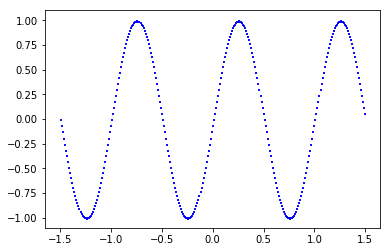

In [6]:
x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
plt.show()

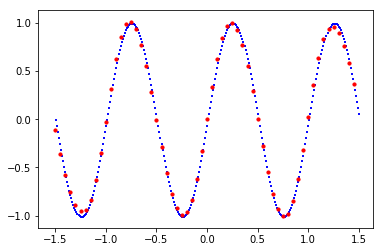

In [25]:
nn = MLPRegressor(
    hidden_layer_sizes=(4,),  activation='tanh', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='adaptive', learning_rate_init=0.1, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(x, y)
test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

### Another example!

In [6]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)

### Generating a dataset

Let's start by generating a dataset we can play with. Fortunately, [scikit-learn](http://scikit-learn.org/) has some useful dataset generators, so we don't need to write the code ourselves. We will go with the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

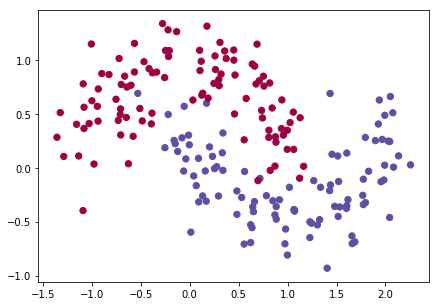

In [7]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

The dataset we generated has two classes, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements. 

Our goal is to train a Machine Learning classifier that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not *linearly separable*, we can't draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that's one of the major advantages of Neural Networks. You don't need to worry about feature engineering. The hidden layer of a neural network will learn features for you.

### Logistic Regression

To demonstrate the point let's train a Logistic Regression classifier. It's input will be the x- and y-values and the output the predicted class (0 or 1). To make our life easy we use the Logistic Regression class from `scikit-learn`.

In [8]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [9]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

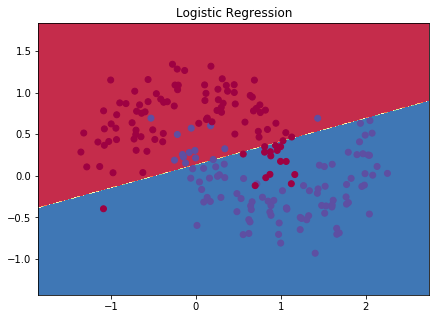

In [10]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

The graph shows the decision boundary learned by our Logistic Regression classifier. It separates the data as good as it can using a straight line, but it's unable to capture the "moon shape" of our data.

### Implementation

Now we are ready for our implementation. We start by defining some useful variables and parameters for gradient descent:

In [11]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

First let's implement the loss function we defined above. We use this to evaluate how well our model is doing:

In [12]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.

In [13]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Finally, here comes the function to train our Neural Network. It implements batch gradient descent using the backpropagation derivates we found above.

In [14]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

### A network with a hidden layer of size 3

Let's see what happens if we train a network with a hidden layer size of 3.


Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068939
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

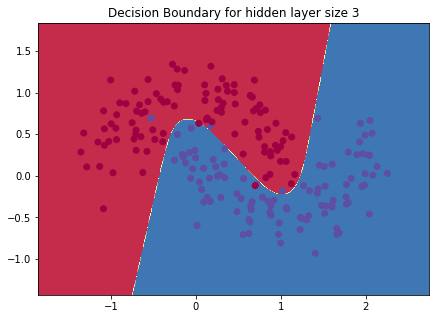

In [15]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Yay! This looks pretty good. Our neural networks was able to find a decision boundary that successfully separates the classes.

## Varying the hidden layer size

In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.


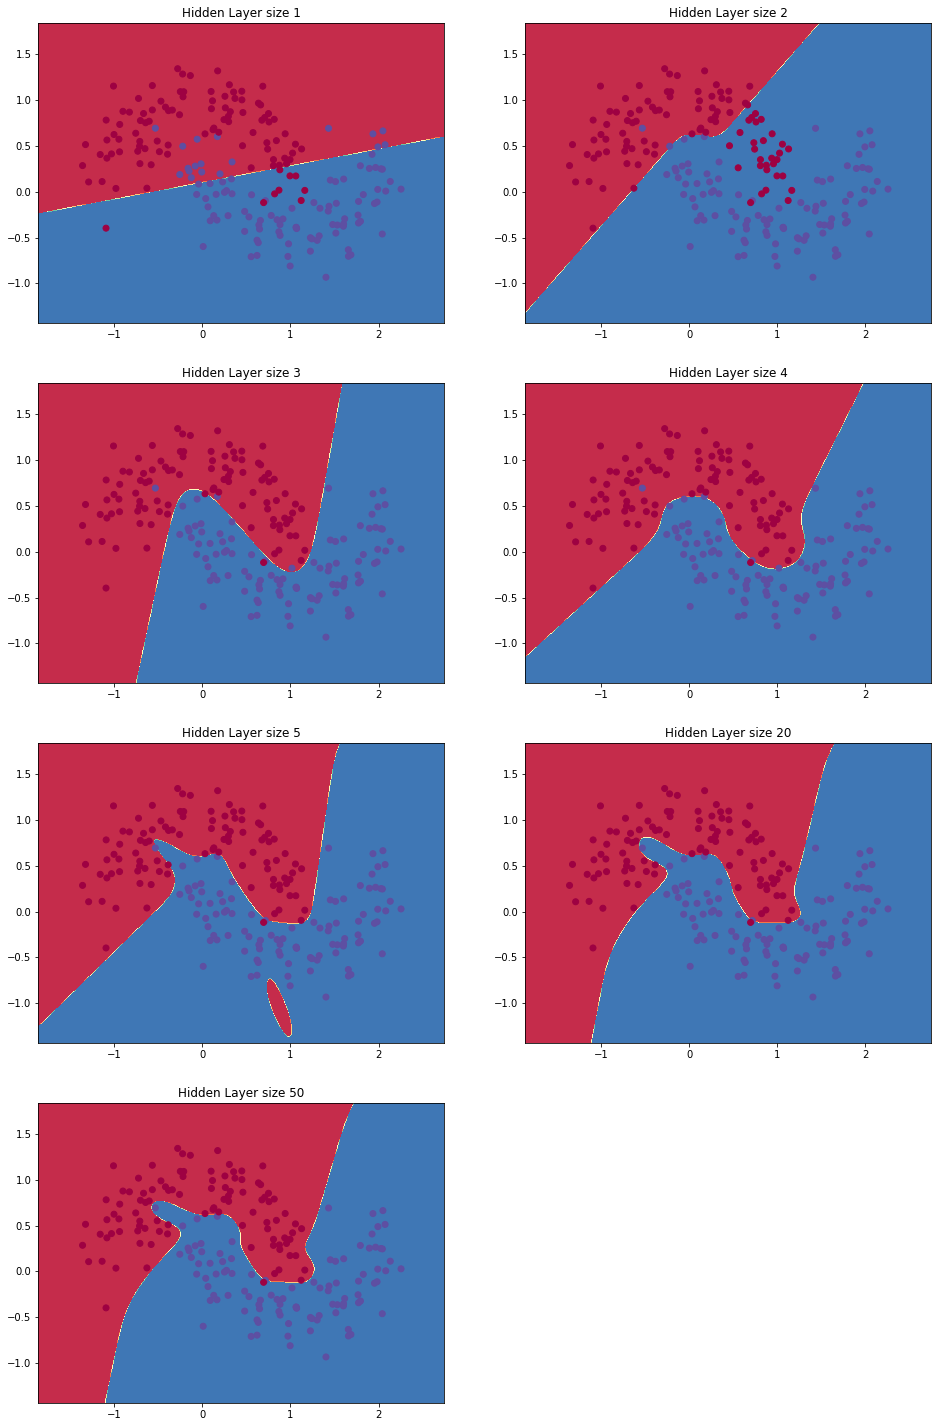

In [16]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

We can see that while a hidden layer of low dimensionality nicely capture the general trend of our data, but higher dimensionalities are prone to overfitting. They are "memorizing" the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better because it generalizes better. We could counteract overfitting with stronger regularization, but picking the correct size for hidden layer is a much more "economical" solution.

### Example: Boston Housing Price

In [32]:
# Here in this code you will see how to use Grid Search to find the best number of nonlinear units in the hidden layer.

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')
 
boston = load_boston()
#df = pd.DataFrame(boston.data, columns = boston.feature_names)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
 
tuned_parameters = [{'hidden_layer_sizes': [1,2,3,4,5,6,7,8,9,10,20,30,40],
'activation': ['relu'],
'solver':['lbfgs'], 'alpha':[0.0001],
'batch_size':['auto'], 'learning_rate':['constant'],
'learning_rate_init':[0.001], 'max_iter':[500]}]
rgr = GridSearchCV(MLPRegressor(), tuned_parameters, cv=5)
rgr.fit(X_train, y_train)
 
#mlp = MLPRegressor(hidden_layer_sizes=(20,), activation='logistic', solver='lbfgs', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
#mlp.fit(X_train,y_train)
train_mse = mean_squared_error(y_train, rgr.predict(X_train))
test_mse = mean_squared_error(y_test, rgr.predict(X_test))
 
print(rgr.best_params_)
print(rgr.best_score_)
print("Train MSE:", np.round(train_mse,2))
print("Test MSE:", np.round(test_mse,2))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'}
0.8181174113597406
Train MSE: 10.58
Test MSE: 16.51


## Feature extraction & Dimensionality Reduction with Deep Neural Nets

### Autoencoders

Autoencoders are one of the unsupervised deep learning models. The aim of an autoencoder is dimensionality reduction and feature discovery. An autoencoder is trained to predict its own input, but to prevent the model from learning the identity mapping, some constraints are applied to the hidden units. 

“Autoencoding” is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term “autoencoder” is used, the compression and decompression functions are implemented with neural networks.

For building an autoencoder, three things are needed: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a “loss” function).

The simplest form of an autoencoder is a feedforward neural network where the input $x$ is fed to the hidden layer and the output of hidden layer is then fed to reconstruct the original inputs. A simple autoencoder is shown below:

<center><img src="images/autoencoder.png" width="650" alt="A simple Autoencoder."></center>
<center><img src="images/autoencoder2.png" width="850" alt="A simple Autoencoder."></center>

Autoencoders map the data they are fed to a lower dimensional space by combining the data’s most important features. It encodes the original data into a more compact representation. It also decides how the data is combined, hence the auto in Autoencoder. We refer to these encoded features as latent variables.

There are a few reasons doing this may be useful:

1. Dimensionality reduction can decrease training time.
1. Using latent feature representations may enhance model performance.


Like the Autoencoder model, Principal Components Analysis (PCA) is also widely used as a dimensionality reduction technique. However, PCA maps the input in a different way than an Autoencoder.

Both PCA and Autoencoder can be thought of as a lossy data compression algorithm. The quality of the data is not perfectly retained -- some of the original data get lost. Notice that it is different with feature selection. Feature selection algorithms discard some features of the data and retain salient features. The features they retain are typically chosen for statistical reasons, such as the correlation between the attribute and the target label. Autoencoder, as a feature extraction algorithm, projects data into a new space.

Let's recap how PCA worked first.

### PCA

PCA works by projecting input data onto the eigenvectors of the data’s covariance matrix. The covariance matrix quantifies the variance of the data and how much each variable varies with respect to one another. Eigenvectors are simply vectors that retain their span through a linear transformation, that is, they point in the same direction before and after the transformation. The covariance matrix transforms the original basis vectors to be oriented in the direction of the covariance between each variable. In simpler terms, the eigenvector allows us to re-frame the orientation of the original data to view it at a different angle without actually transforming the data. We are essentially extracting the component of each variable that leads to the most variance when we project the data onto these vectors. We can then select the dominant axes using the eigenvalues of the covariance matrix because they reflect the magnitude of the variance in the direction of their corresponding eigenvector.

<center><img src="https://drive.google.com/uc?export=view&id=1ifTzuIC47I1DTP88cwUvtRQtG-_5OQIy" width="450" alt="A simple Autoencoder."></center>

These projections result in a new space, where each basis vector encapsulates the most variance (i.e. the projections onto the eigenvector with the largest eigenvalue have the most variance, the ones on the second eigenvector have the second most variance, etc.). These new basis vectors are referred to as the principal components. We want principal components to be oriented in the direction of maximum variance because greater variance in attribute values can lead to better forecasting abilities. For example, say you’re trying to predict the price of a car given two attributes: color and brand. Suppose all the cars have the same color, but there are many brands among them. Guessing a car’s price based on its color — a feature with zero variance — would be pretty much impossible in this example. However, if we considered a feature with more variance, the brand, we will be able to come up with better price estimates because Audis and Ferraris tend to be priced higher than Hondas and Toyotas. The principal components resulting from PCA are linear combinations of the input variables . The linear nature of these principal components also allow us to interpret the transformed data.


**PCA Pros**:

* Reduces dimensionality
* Interpretable
* Fast run time

**PCA Cons**:
* Incapable of learning non-linear feature representations

**Autoencoder Pros**:

* Able to learn non-linear feature representations
* Reduce dimensionality

**Autoencoder Cons**:

* Computationally expensive to train
* Extremely uninterpretable
* The underlying math is more complicated
* Prone to overfitting, though this can be mitigated via regularization

### Autoencoders with Keras (The Python Deep Learning library)

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Read the documentation at [Keras.io](https://keras.io).

#### What’s Required

- Encoding function
- Decoding function
- Loss function describing the amount of information loss between the compressed and decompressed representations of the data examples and the decompressed representation (i.e. a “loss” function).

The encoding/decoding functions are typically neural nets and are differentiable. The differentiable part enables optimizing the parameters of the encoding/decoding functions to minimize the reconstruction loss.


> In fact, if the encoder/decoder functions are linear, the result spans the space of the PCA solution. The nonlinear part is useful because they can capture, for example, multimodality (~ non normality) in the feature space, which PCA can’t.

#### Let's build the simplest possible autoencoder

from: https://blog.keras.io/building-autoencoders-in-keras.html


In [2]:
# Importing the required libraries

#from keras.datasets import mnist
#from keras.layers import Input, Dense
#from keras.models import Model

## try this if you received an error

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Loading the MNIST dataset images and not their labels. We want to reconstruct the images as output of the autoencoder and hence we do not need labels.

https://en.wikipedia.org/wiki/MNIST_database

In [3]:
# Creating a training set and test set and normalizing the data for better training.

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Our input image has a dimension of 784, we will encode it to 32 (Dimensionality reduction) and the decode it back to the original dimension of 784.

We need to take the input image of dimension 784 and convert it to keras tensors (3D Matrix).

In [4]:
input_img= Input(shape=(784,))

In [5]:
encoded = Dense(units=32, activation='relu')(input_img)

In [14]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [7]:
# this model maps an input to its reconstruction
autoencoder=Model(input_img, decoded)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
# To get the extracted nonlinear common factor from encoder:

encoder = Model(input_img, encoded)

We now compile the autoencoder model with **Adam** optimizer. As pixels have a value of 0 0r 1 we use **binary_crossentropy** as the loss function and the metrics uses for the performance of the model is accuracy

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We now train the autoencoder using the training data with 50 epochs and batch size of 256. We also shuffle the training data

In [15]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2001 - accuracy: 0.8077 - val_loss: 0.1831 - val_accuracy: 0.8077
Epoch 2/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1783 - accuracy: 0.8094 - val_loss: 0.1805 - val_accuracy: 0.8087
Epoch 3/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1764 - accuracy: 0.8096 - val_loss: 0.1752 - val_accuracy: 0.8082
Epoch 4/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1712 - accuracy: 0.8101 - val_loss: 0.1722 - val_accuracy: 0.8093
Epoch 5/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1694 - accuracy: 0.8106 - val_loss: 0.1675 - val_accuracy: 0.8098
Epoch 6/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1708 - accuracy: 0.8104 - val_loss: 0.1645 - val_accuracy: 0.8102
Epoch 7/20
60000/60000 [===========================

Predicting the test set. We want to view the encoded images as well as the reconstructed images so we fit the test data on both autoencoder as well as encoder

In [16]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

Let’s plot the original input, encoded images (compressed representation) and the reconstructed images using matplotlib

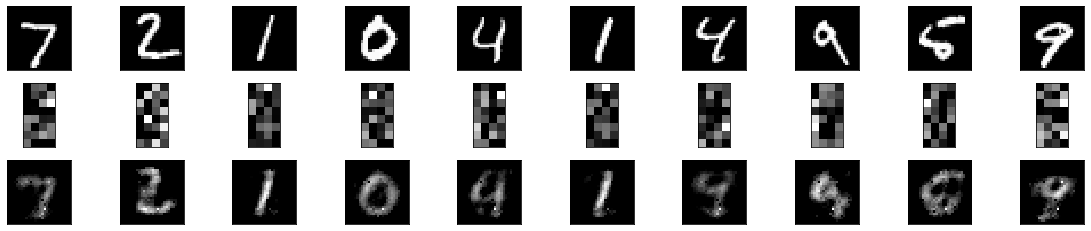

In [17]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()